In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl 

## agg backend is used to create plot as a .png file
mpl.use('agg')

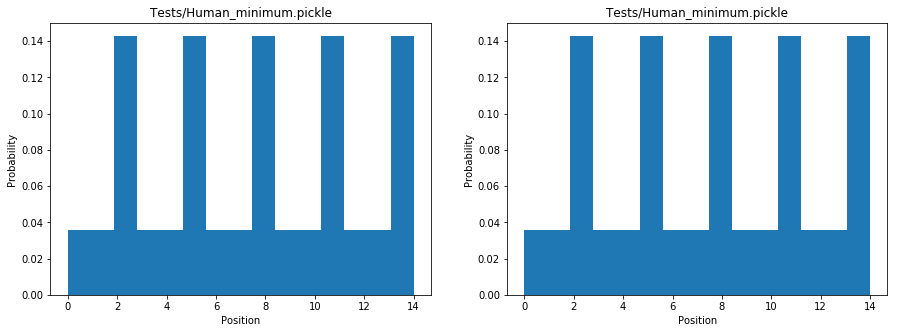

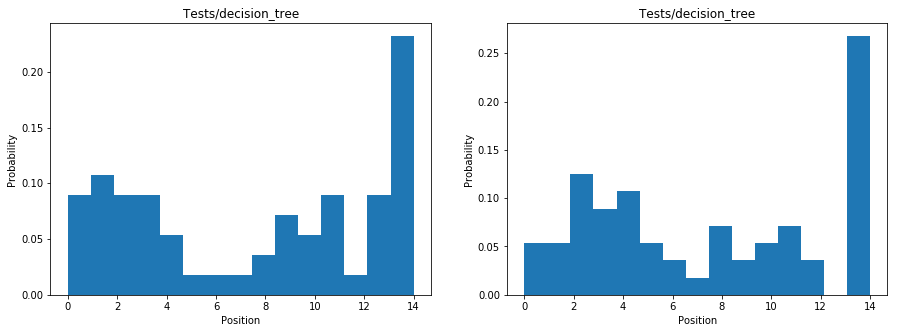

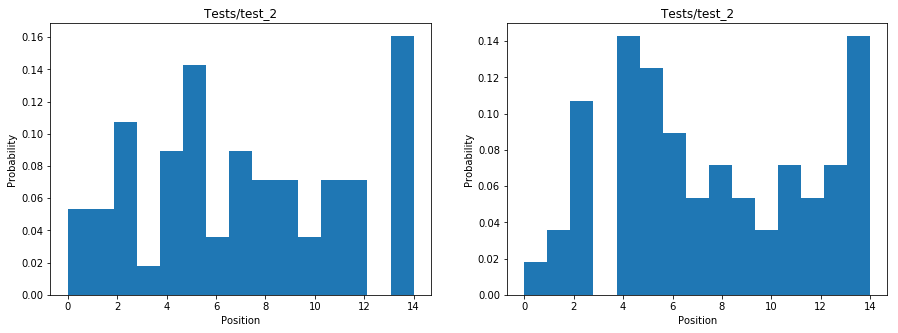

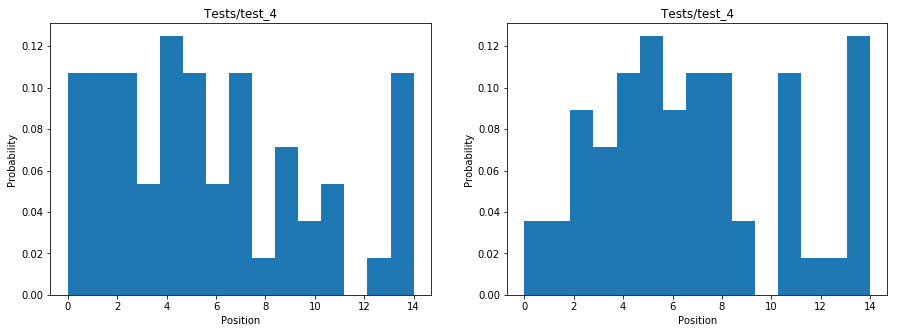

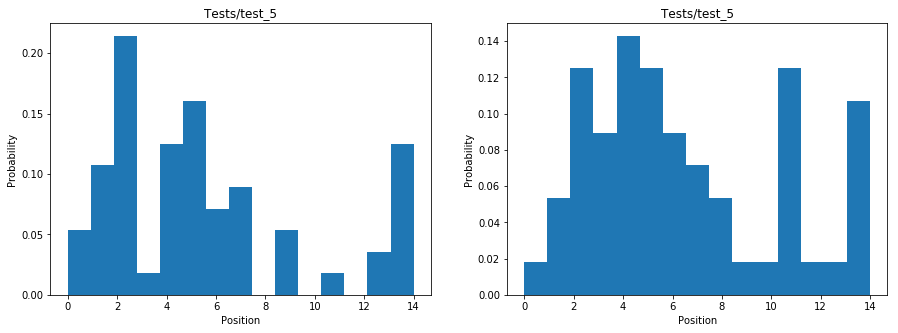

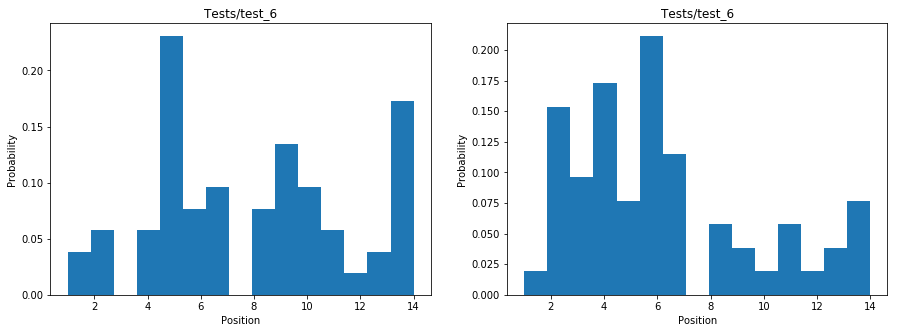

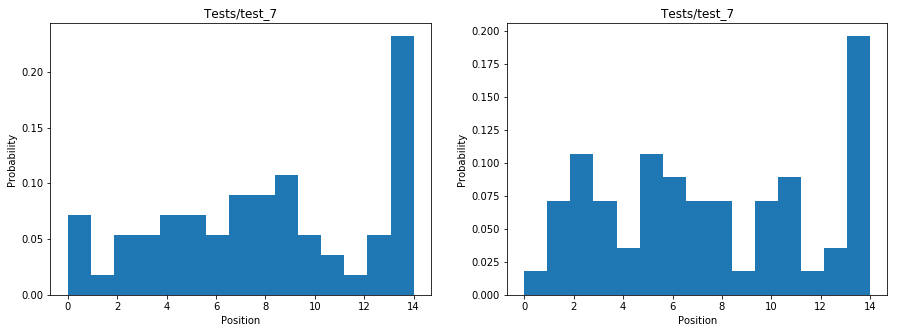

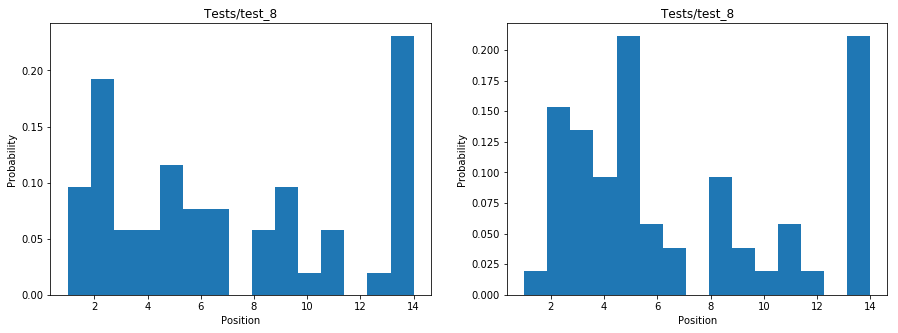

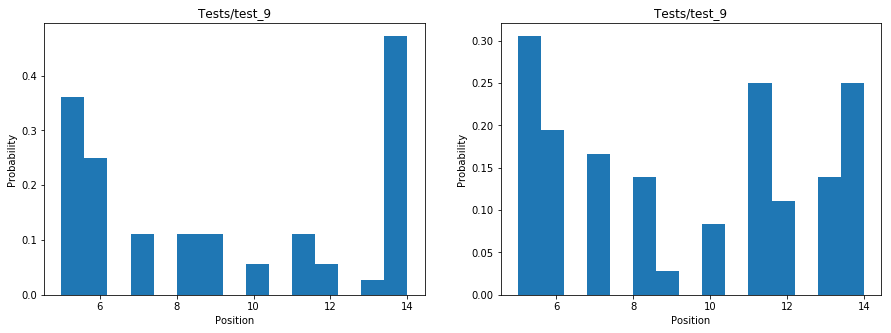

In [6]:
filenames = ["Tests/Human_minimum.pickle", "Tests/decision_tree", 
             "Tests/test_2", "Tests/test_4", "Tests/test_5", 
             "Tests/test_6", "Tests/test_7", "Tests/test_8", 
             "Tests/test_9"]
for file_name in filenames:
    fileObject = open(file_name,'rb')  
    all_selected = pickle.load(fileObject)

    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)

    num = [x[1] for x in all_selected[0]]
    plt.subplot(1, 2, 1)
    plt.hist(num, density=True, bins=15)
    plt.title(file_name)
    plt.xlabel('Position')
    plt.ylabel('Probability')

    num = [x[1] for x in all_selected[1]]
    plt.subplot(1, 2, 2)
    plt.hist(num, density=True, bins=15)
    plt.title(file_name)
    plt.xlabel('Position')
    plt.ylabel('Probability')

    plt.show()

    fileObject.close()

In [7]:
def plot(plot_data, filename):
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(6)
    j = 0;
    for num in plot_data:
        y_pos = np.arange(len(num))
        j += 1
        plt.subplot(2, 2, j)
        plt.subplots_adjust(wspace=0.5, hspace=0.2)
        if j==1 or j==3:
            plt.plot(y_pos, num, 'ro')
            plt.title(file_name)
            plt.ylim([0, 1 if j == 1 or j == 3 else np.ceil(np.max(num)) + 5])     
            plt.xticks(np.arange(5), ('3', '6', '9', '12', '15'))
        else:
            bp = plt.boxplot(num, showfliers=False, patch_artist=True)
            plt.title(file_name)
            plt.xticks(np.arange(6), ('0', '3', '6', '9', '12', '15'))
            
            for box in bp['boxes']:
                # change outline color
                box.set( color='#7570b3', linewidth=2)
                # change fill color
                facecolor = '#1b9e77'

            ## change color and linewidth of the whiskers
            for whisker in bp['whiskers']:
                whisker.set(color='#7570b3', linewidth=2)

            ## change color and linewidth of the caps
            for cap in bp['caps']:
                cap.set(color='#7570b3', linewidth=2)

            ## change color and linewidth of the medians
            for median in bp['medians']:
                median.set(color='#b2df8a', linewidth=2)

            ## change the style of fliers and their fill
            for flier in bp['fliers']:
                flier.set(marker='o', color='#e7298a', alpha=0.5)
        #plt.xlim([-1,15])
        plt.xlabel('Position')
        plt.grid(which='minor')
        plt.ylabel('Probability' if j == 1 or j == 3 else 'Error')
    
    # Save the figure
    fig.savefig(filename , bbox_inches='tight')

decision_tree 		 [13.0, 24.0] [1404.0, 1642.0]
test_2 		 [18.0, 29.0] [979.0, 1134.0]
test_4 		 [18.0, 32.0] [947.0, 1034.0]
test_5 		 [15.0, 24.0] [1043.0, 1026.0]
test_6 		 [15.0, 17.0] [1351.0, 1907.0]
test_7 		 [15.0, 29.0] [1109.0, 1383.0]
test_8 		 [25.0, 28.0] [910.0, 1494.0]
test_9 		 [25.0, 26.0] [1026.0, 1352.0]


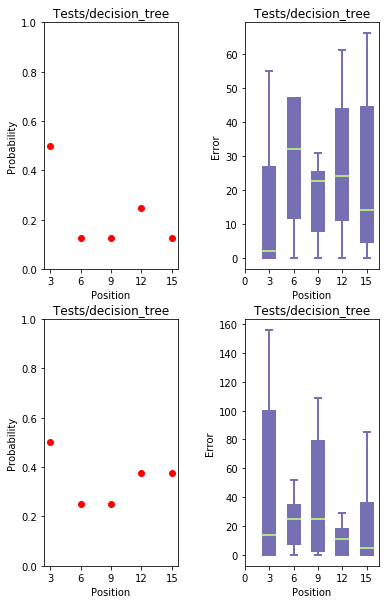

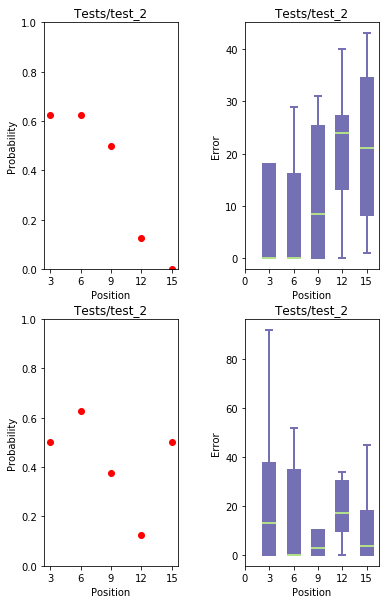

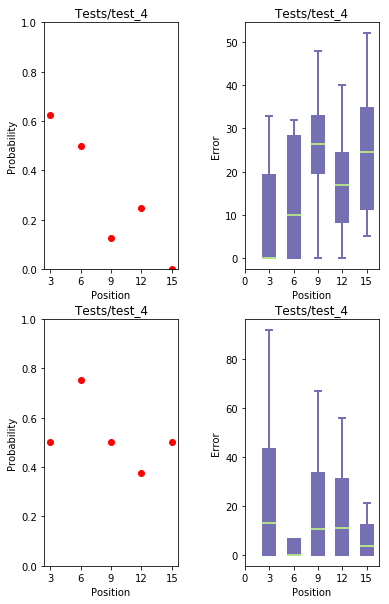

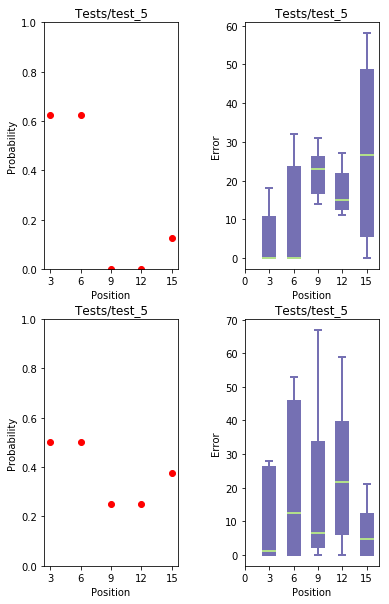

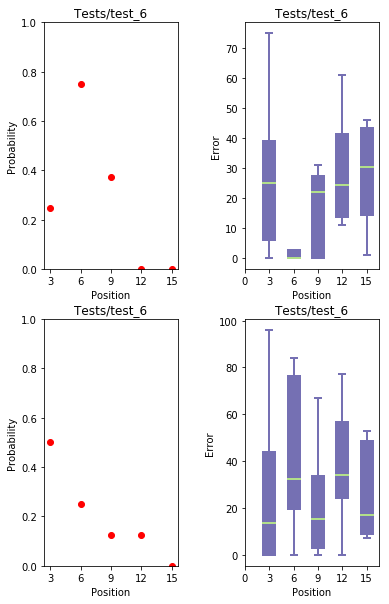

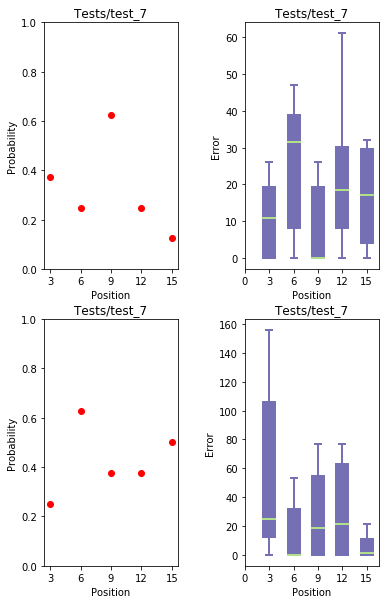

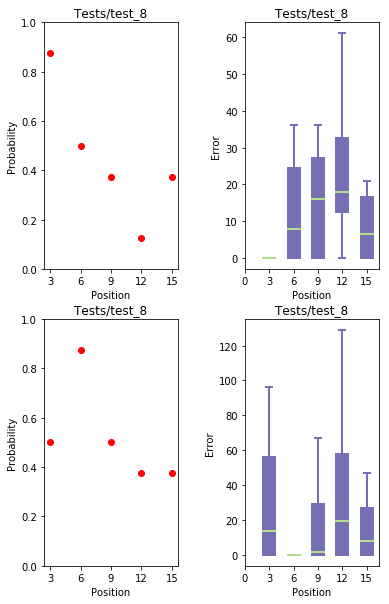

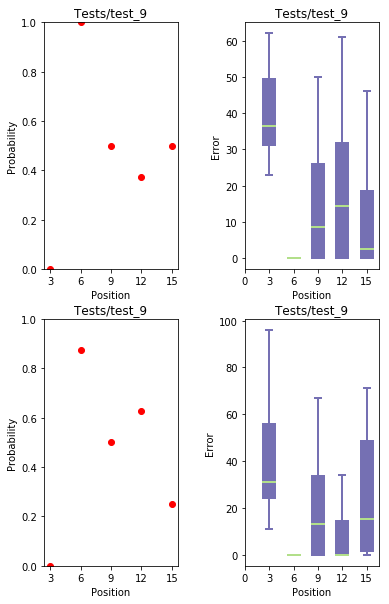

In [8]:
fileObject = open("Tests/Human_minimum.pickle",'rb')  
minima = pickle.load(fileObject)
fileObject.close()

figure = ".png"
data_correct =[]
    
for i in range (len(all_selected)):
    temp_data_correct = np.zeros(15)
    for j in range (len(all_selected[i])):
        temp_data_correct[minima[i][j][1]] += 1

    data_correct.append(temp_data_correct)

filenames = ["Tests/decision_tree", "Tests/test_2", "Tests/test_4", 
             "Tests/test_5", "Tests/test_6", "Tests/test_7", 
             "Tests/test_8", "Tests/test_9"]
for file_name in filenames:
    fileObject = open(file_name,'rb')  
    all_selected = pickle.load(fileObject)
    fileObject.close()
    
    indices = [2, 5, 8, 11, 14]
    plot_data = []
    add = []
    error_sum = []
    for i in range (len(all_selected)):
        temp_correct = np.zeros(15)
        temp_error_sum = 0
        temp_error = [[] for i in range(15)]
        
        for j in range (len(all_selected[i])):
            if all_selected[i][j] == minima[i][j]:
                temp_correct[minima[i][j][1]] += 1
            
            temp_error[minima[i][j][1]].append(np.abs(all_selected[i][j][0] - minima[i][j][0]))
            temp_error_sum += np.abs(all_selected[i][j][0] - minima[i][j][0])
            
        add.append(np.sum(temp_correct))
        error_sum.append(temp_error_sum)
        #temp_error = np.true_divide(temp_error, data_correct)
        temp_correct = np.true_divide(temp_correct, data_correct)        
        plot_data.append(np.take(temp_correct, indices))
        plot_data.append(np.take(temp_error, indices))
    
    print(file_name[6:], '\t\t', add, error_sum)
    plot(plot_data, "Results/Human/"+file_name[6:]+figure)